Read the files 


In [1]:
with open('Train.pos', 'r',encoding='utf-8', errors='ignore') as f:
    txtpos = f.readlines()

with open('Train.neg','r',encoding='utf-8', errors='ignore') as f:
    txtneg = f.readlines()    

In [2]:
len(txtpos)

5000

In [3]:
len(txtneg)

5000

In [4]:
txtpos[87]

'director kapur is a filmmaker with a real flair for epic landscapes and adventure , and this is a better film than his earlier english-language movie , the overpraised elizabeth . \n'

In [5]:
import random
random.shuffle(txtneg)
random.shuffle(txtpos)
txt=txtneg+txtpos
len(txt)

10000

In [6]:
from nltk.corpus import stopwords
import re
import numpy as np
import matplotlib.pyplot as plt

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [7]:
def preprocessing(corpus):
  for i in range(len(corpus)):
    corpus[i]=corpus[i].lower()
    corpus[i]=re.sub('[^A-Za-z0-9]+', ' ', corpus[i])
    corpus[i]=' '.join(e.lower() for e in corpus[i].split() if e.lower() not in stopwords)
  return corpus

In [8]:
txt=preprocessing(txt)
labels=[0]*5000+[1]*5000


In [9]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim

In [10]:
# Word2vec model
model = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
Word2Vecdict={}
for key in model.vocab.keys():
    Word2Vecdict[key]=model.wv[key]
    

KeyboardInterrupt: 

In [ ]:

# Glove Model
glove_dict = {}
with open("glove.6B/glove.6B.300d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        glove_dict[word] = vector

In [ ]:
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
ft = fasttext.load_model('cc.en.300.bin')
fasttextdict={}
for key in ft.words:
    fasttextdict[key]=ft[key]

In [ ]:
def avg_sentence(corpus, word_dict,avg=0):
  embeddings=[]

  for sentence in corpus:
    v = np.zeros(300)
    for w in sentence.split():
    #     if w in wv:
        
        
        if avg==0:
            if w in word_dict.keys():
                v += word_dict[w]
            # else:
            #     v+=np.random.randn(300)

        # Take the average
        else:
            if w in Word2Vecdict.keys():
                v += Word2Vecdict[w]
            if w in fasttextdict.keys():
                v += fasttextdict[w]
            if w in glove_dict.keys():
                v += glove_dict[w]
            v/=3

    embeddings.append(v/len(sentence))
  return embeddings

In [ ]:
len(txt[0])

23

In [ ]:
# def avg_sentence1(sentence, word_dict,avg=0):  
#     v = np.zeros(300)
#     for w in sentence:
#     #     if w in wv:
#         if avg==0:
#             if w in word_dict.keys():
#                 v += word_dict[w]

#         # Take the average
#         else:
#             if w in Word2Vecdict.keys():
#                 v += Word2Vecdict[w]
#             if w in fasttextdict.keys():
#                 v += fasttextdict[w]
#             if w in glove_dict.keys():
#                 v += glove_dict[w]
#             v/=3
#     return v/len(sentence)

In [ ]:
# import numpy as np
# X_train=[]
# Y_train=[]
# X_val=[]
# Y_val=[]
# count=0
# currdict=glove_dict

# for i in txt:
#     if(count<4000):
#         Y_train.append(0)
#         X_train.append(avg_sentence1(i.split(),currdict))
#     elif(count<5000):
#         Y_val.append(0)
#         X_val.append(avg_sentence1(i.split(),currdict))
#     elif(count<9000):
#         Y_train.append(1)
#         X_train.append(avg_sentence1(i.split(),currdict))
#     else:
#         Y_val.append(1)
#         X_val.append(avg_sentence1(i.split(),currdict))
#     count=count+1

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(txt, labels, test_size=0.2,stratify=labels)
print(len(X_train), len(X_val))

8000 2000


In [ ]:
currdict=fasttextdict
X_train=avg_sentence(X_train,currdict)
X_val=avg_sentence(X_val,currdict)

In [ ]:
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
X_train=torch.tensor(X_train)
X_train=X_train.float()
Y_train=torch.tensor(Y_train)
Y_train=Y_train.long()
X_val=torch.tensor(X_val)
X_val=X_val.float()
Y_val=torch.tensor(Y_val)
Y_val=Y_val.long()


/raid/home/piyushmishra/miniconda3/envs/newenv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#put the code into gpu
device = torch.device("cuda")

X_train=X_train.to(device)
Y_train=Y_train.to(device)
X_val=X_val.to(device)
Y_val=Y_val.to(device)

RuntimeError: CUDA error: out of memory

In [ ]:
X_train.shape

torch.Size([8000, 300])

In [ ]:
class FirstNetwork_v2(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(300, 128), 
        nn.Dropout(p=0.5),
        nn.ReLU(), 
        nn.Linear(128, 64),
        nn.Dropout(p=0.5),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.Dropout(p=0.5),
        nn.ReLU(),
        nn.Linear(32, 2), 
        nn.Softmax()
    )

  def forward(self, X):
    return self.net(X)

In [ ]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred == y).float().mean()

In [ ]:
def fit_v2(x, y, model, opt, loss_fn, epochs = 1000):
  loss_arr=[]
  training_arr=[]
  val_arr=[]
  training_arr.append(accuracy(fn(X_train), Y_train))
  val_arr.append(accuracy(fn(X_val), Y_val))
  for epoch in range(epochs):
    loss = loss_fn(model(x), y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    loss_arr.append(loss.item())
    training_arr.append(accuracy(fn(X_train), Y_train))
    val_arr.append(accuracy(fn(X_val), Y_val))
  plt.plot(training_arr, 'r-')
  plt.plot(val_arr, 'b-')
  
  plt.show()
  return loss_arr

In [ ]:
fn = FirstNetwork_v2()
fn.to(device)

loss_fn = F.cross_entropy
opt = optim.Adam(fn.parameters(),weight_decay=1e-5,lr=0.001)


/raid/home/piyushmishra/miniconda3/envs/newenv/lib/python3.8/site-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


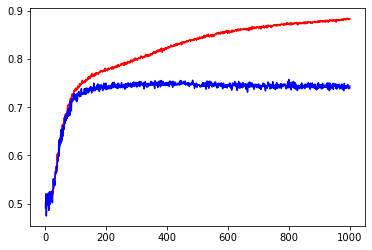

In [ ]:
opt = optim.Adam(fn.parameters(),weight_decay=1e-5,lr=0.001)
loss_arr=fit_v2(X_train, Y_train, fn, opt, loss_fn)


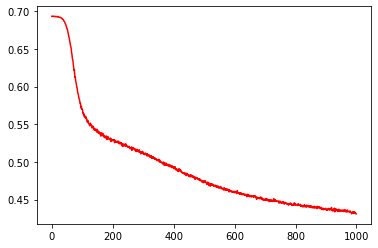

In [ ]:
plt.plot(loss_arr, 'r-')
plt.show()


In [ ]:
accuracy(fn(X_val), Y_val)

tensor(0.7380, device='cuda:0')

In [ ]:
Y_val.sum()

tensor(1000, device='cuda:0')

In [ ]:
with open('TestData', 'r',encoding='utf-8', errors='ignore') as f:
    testdata = f.readlines()

In [ ]:
X_test=preprocessing(testdata)
Y_test=[1]*331+[0]*331

In [ ]:
X_test=avg_sentence(X_test,currdict)
X_test=torch.tensor(X_test)
X_test=X_test.float()
X_test=X_test.to(device)
Y_test=torch.tensor(Y_test)
Y_test=Y_test.long()
Y_test=Y_test.to(device)



In [ ]:
accuracy(fn(X_test), Y_test)

tensor(0.7674, device='cuda:0')

In [ ]:
pred = torch.argmax(Y_pred, dim=1)
x=409
print(testdata[x])
pred[x]

NameError: name 'Y_pred' is not defined

In [ ]:
X_train.shape

torch.Size([8000, 300])

Run the Code with batches also

In [ ]:
import torch.utils.data as data_utils

train = data_utils.TensorDataset(X_train, Y_train)
train_loader = data_utils.DataLoader(train, batch_size=300, shuffle=True)
validation = data_utils.TensorDataset(X_val, Y_val)
validation_loader = data_utils.DataLoader(validation, batch_size=300, shuffle=True)
test = data_utils.TensorDataset(X_test, Y_test)
test_loader = data_utils.DataLoader(test, batch_size=300, shuffle=True)

In [ ]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = fn(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [ ]:
def fit_v3(x, y, model, opt, loss_fn, epochs = 600):
  loss_arr=[]
  training_arr=[]
  val_arr=[]
  training_arr.append(evaluation(train_loader))
  prev=evaluation(validation_loader)
  val_arr.append(prev)
  patient=0
  for epoch in range(epochs):
    count=0
    loss_value=0
    for i, data in enumerate(train_loader):

      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)
      opt.zero_grad()
      loss = loss_fn(model(inputs), labels)
      
      loss.backward()
      opt.step()
      
      count=count+1
      loss_value=loss_value+loss.item()
    loss_arr.append(loss_value/count)
    training_arr.append(evaluation(train_loader))
    curr=evaluation(validation_loader)
    val_arr.append(curr)
    if(prev>curr):
      patient=patient+1
    prev=curr
    
   
  plt.plot(training_arr, 'r-')
  plt.plot(val_arr, 'b-')
  plt.show()
  return loss_arr

In [ ]:
def fit_v4(x, y, model, opt, loss_fn, epochs = 1000):
  loss_arr=[]
  training_arr=[]
  val_arr=[]
  train_losses = []
    # to track the validation loss as the model trains
  valid_losses = []
  avg_train_losses = []
    # to track the average validation loss per epoch as the model trains
  avg_valid_losses = [] 
  training_arr.append(evaluation(train_loader))
  prev=evaluation(validation_loader)
  val_arr.append(prev)
  pvalid=0
  patient=0
  best_acc=0
  for epoch in range(epochs):
    count=0
    loss_value=0
    for i, data in enumerate(train_loader):

      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)
      opt.zero_grad()
      loss = loss_fn(model(inputs), labels)
      
      loss.backward()
      opt.step()
      train_losses.append(loss.item())
      count=count+1
      loss_value=loss_value+loss.item()

    for i, data in enumerate(validation_loader):

      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)
      loss = loss_fn(model(inputs), labels)
      
      
      
      valid_losses.append(loss.item())

    loss_arr.append(loss_value/count)
    curr_train_arr=evaluation(train_loader)
    training_arr.append(curr_train_arr)
    curr_validation_arr=evaluation(validation_loader)
    val_arr.append(curr_validation_arr)
    

    train_loss = np.average(train_losses)
    valid_loss = np.average(valid_losses)
    avg_train_losses.append(train_loss)
    avg_valid_losses.append(valid_loss)

    epoch_len = len(str(epochs))
    print_msg = (f'[{epoch:>{epoch_len}}/{epochs:>{epoch_len}}] ' +
                  f'train_loss: {train_loss:.5f} ' +
                  f'valid_loss: {valid_loss:.5f} ' +
                  f'training_arr: {curr_train_arr:.5f} ' +
                  f'validation_arr: {curr_validation_arr:.5f} '
                  )
    
    print(print_msg)
    if curr_validation_arr >= best_acc:
      best_acc = curr_validation_arr
      es = 0
      torch.save(fn.state_dict(), "model_" )
    else:
        es += 1
        print("Counter {} of 5".format(es))

        if es > 10:
            print("Early stopping with best_acc: ", best_acc, "and val_acc for this epoch: ", curr_validation_arr, "...")
            break
        
    # clear lists to track next epoch
    train_losses = []
    valid_losses = []
    # if(len(avg_valid_losses)>1):
    #   if(avg_valid_losses[-1]>avg_valid_losses[-2]):
    #     pvalid=pvalid+1
    #   else:
    #     pvalid=0

    # if(pvalid==10):
    #   break
    
   
  plt.plot(training_arr, 'r-')
  plt.plot(val_arr, 'b-')
  plt.show()
  return loss_arr

/raid/home/piyushmishra/miniconda3/envs/newenv/lib/python3.8/site-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[   0/1000] train_loss: 0.69335 valid_loss: 0.69324 training_arr: 51.12500 validation_arr: 49.40000 
[   1/1000] train_loss: 0.69269 valid_loss: 0.69244 training_arr: 51.65000 validation_arr: 52.25000 
[   2/1000] train_loss: 0.69137 valid_loss: 0.68958 training_arr: 57.05000 validation_arr: 57.10000 
[   3/1000] train_loss: 0.68294 valid_loss: 0.67322 training_arr: 65.52500 validation_arr: 63.25000 
[   4/1000] train_loss: 0.65202 valid_loss: 0.62920 training_arr: 68.35000 validation_arr: 67.80000 
[   5/1000] train_loss: 0.60557 valid_loss: 0.59386 training_arr: 71.38750 validation_arr: 71.05000 
[   6/1000] train_loss: 0.57802 valid_loss: 0.58267 training_arr: 72.32500 validation_arr: 71.35000 
[   7/1000] train_loss: 0.56389 valid_loss: 0.56974 training_arr: 73.76250 validation_arr: 71.90000 
[   8/1000] train_loss: 0.56299 valid_loss: 0.56757 training_arr: 74.43750 validation_arr: 72.45000 
[   9/1000] train_loss: 0.55595 valid_loss: 0.57456 training_arr: 74.67500 validation_arr: 

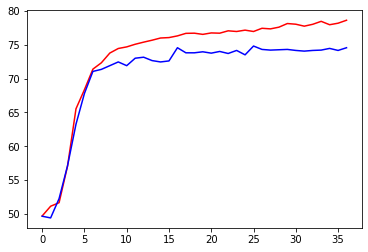

In [ ]:
fn = FirstNetwork_v2()
fn.to(device)

loss_fn = F.cross_entropy
opt = optim.Adam(fn.parameters(),lr=0.001)

loss_arr=fit_v4(X_train, Y_train, fn, opt, loss_fn)

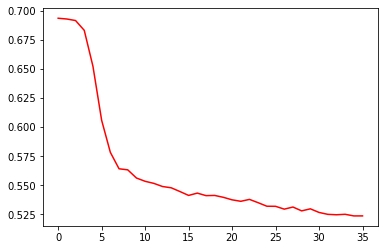

In [ ]:
plt.plot(loss_arr, 'r-')
plt.show()

In [ ]:
evaluation(validation_loader)   #391

73.9

In [ ]:
evaluation(test_loader)

75.07552870090635

In [ ]:
from pytorchtools import EarlyStopping


ImportError: cannot import name 'EarlyStopping' from 'pytorchtools' (/raid/home/piyushmishra/miniconda3/envs/newenv/lib/python3.8/site-packages/pytorchtools/__init__.py)